In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
path_json = 'data/docs'
path_csv = 'data'
file_csv = os.path.join(path_csv, 'document_departments.csv')

In [4]:
data = pd.read_csv(file_csv)
data.head(5)

,Document ID,Department
0,8196431,Customer service
1,8278123,Digital Marketing
2,8331625,Sales
3,8331003,Back office ticketing
4,8277939,Digital Marketing


In [5]:
print('Total number of dataset available %d'%(len(data)))

Total number of dataset available 1162


In [6]:
data.loc[data['Department'].isin(['Learning and Development '])]

,Document ID,Department
571,7796107,Learning and Development


In [7]:
obj = json.load(open(os.path.join(path_json, str(data['Document ID'][0]) + '.json')))
obj

{'company_info': {'Email': 'pragati@synergyace.com',
  'Company Name': '[Company Hidden]',
  'Telephone': '9004493548'},
 'api_data': {'job_location': ['Navi Mumbai', 'Pune', 'Ahmedabad'],
  'jd_id': '8196431',
  'job_keywords': ['telesales',
   ' telemarketing',
   ' communication',
   'call centre voice',
   ' customer support voice',
   ' voice process',
   ' bpo operations',
   ' domestic process',
   ' customer service',
   ' outbound process'],
  'job_industry': 'Travel / Tourism',
  'company_name': '[Company Hidden]',
  'job_experience': '0 to 2 Yrs',
  'job_title': 'Telesales / Telemarketing Executive'},
 'other_details': {'Other Skills:': ['call centre voice',
   'customer support voice',
   'voice process',
   'bpo operations',
   'domestic process',
   'customer service',
   'outbound process'],
  'Department:': ['Customer Service (Domestic)', 'Customer Care Executive'],
  'Industry:': ['Travel / Tourism'],
  'Skills:': ['telesales', 'telemarketing', 'communication']},
 'top

Useful Attributes
1. job_keywords
2. job_title
3. Skills
4. Department

In [8]:
print(obj['other_details'].keys())

dict_keys(['Other Skills:', 'Department:', 'Industry:', 'Skills:'])


In [9]:
print('Number of attributes: %d'%(len(obj.keys())))

Number of attributes: 6


In [10]:
data['count'] = data['Department'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = data.groupby('Department').agg({'count': 'sum'}).reset_index()

In [11]:
unique_img_ids.head()

,Department,count
0,Administration,38
1,Airline Ground Operations,4
2,Analytics,9
3,Back office ticketing,18
4,Content,6


### Creating a Hashmap of Departments

In [12]:
unique_img_ids['Department'].values

array(['Administration', 'Airline Ground Operations', 'Analytics',
       'Back office ticketing', 'Content', 'Customer service',
       'Data entry', 'Digital Marketing',
       'Engineering Design Construction', 'Finance', 'Flight Operations',
       'IT', 'Learning and Development ', 'Logistics', 'Maintenance',
       'Management Consulting', 'Marine Deck ', 'Marine Engineering ',
       'Marine Service Steward ', 'Marketing', 'Operations', 'Presales ',
       'Procurement', 'Public Relations ', 'QA ', 'Recruitment',
       'Safety ', 'Sales', 'Technology', 'Ticketing'], dtype=object)

In [13]:
depart_map = {}
for i in range(len(unique_img_ids)):
    depart_map[unique_img_ids['Department'][i]] = i+1

In [14]:
print('Number of departments: %d'%(len(unique_img_ids)))

Number of departments: 30


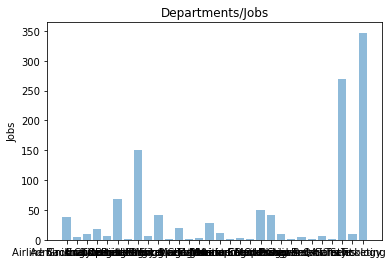

In [15]:
y_pos = np.arange(len(unique_img_ids))
objects = unique_img_ids['Department']
performance = unique_img_ids['count']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jobs')
plt.title('Departments/Jobs')

plt.show()

In [16]:
attributes= obj['api_data']['job_keywords']
department = obj['other_details']['Department:']
title = obj['api_data']['job_title']
print(attributes)
print(department)
print(title)

['telesales', ' telemarketing', ' communication', 'call centre voice', ' customer support voice', ' voice process', ' bpo operations', ' domestic process', ' customer service', ' outbound process']
['Customer Service (Domestic)', 'Customer Care Executive']
Telesales / Telemarketing Executive


In [17]:
n = len(data)
label = []
keyword = []

In [18]:
for i in range(n):
    obj = json.load(open(os.path.join(path_json, str(data['Document ID'][i]) + '.json')))
    department = obj['other_details']['Department:']
    title = obj['api_data']['job_title']
    obj = obj['api_data']['job_keywords']
    
    st = [st.strip(' ') for st in obj]
    dp = [dp.strip(' ') for dp in department]
    tt = [tt.strip(' ') for tt in title]
    st = st + dp + tt
    
    str_join = ",".join(st)
    label.append(depart_map[data['Department'][i]])
    keyword.append(str_join)

In [19]:
df = []
df = pd.DataFrame(label, columns=['label'])
df.head()

,label
0,6
1,8
2,28
3,4
4,8


In [20]:
df2 = pd.DataFrame(keyword, columns=['keyword'])
df2.head()

,keyword
0,"telesales,telemarketing,communication,call cen..."
1,"internet media,facebook marketing,online adver..."
2,"immigration,canada pr,australia pr,client serv..."
3,"documentation,,Back Office Operations,F,r,e,s,..."
4,"internet media,facebook marketing,online adver..."


In [21]:
df = df.merge(df2, left_index=True, right_index=True)
df.head()

,label,keyword
0,6,"telesales,telemarketing,communication,call cen..."
1,8,"internet media,facebook marketing,online adver..."
2,28,"immigration,canada pr,australia pr,client serv..."
3,4,"documentation,,Back Office Operations,F,r,e,s,..."
4,8,"internet media,facebook marketing,online adver..."


In [22]:
x = df['keyword'].values
y = df['label'].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
print('size of x_train %s, x_test %s, y_train %s, y_test %s'%(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

size of x_train (871,), x_test (291,), y_train (871,), y_test (291,)


In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)
X_train

<871x1295 sparse matrix of type '<class 'numpy.int64'>'
	with 9215 stored elements in Compressed Sparse Row format>

## Number of Classifiers

### 1. Logistic Regression

In [26]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)

print("Accuracy of Logistic classifier:", round(score,4)*100)

Accuracy of Logistic classifier: 88.66000000000001


### 2. Stochastic Gradient Descent

In [27]:
sgd = sklearn.linear_model.SGDClassifier()
sgd.fit(X_train, y_train)
score = sgd.score(X_test, y_test)

print("Accuracy of sgd classifier:", round(score,4)*100)

Accuracy of sgd classifier: 84.88


### 3. Decision Tree

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
score = tree.score(X_test, y_test)

print("Accuracy of tree classifier:", round(score,4)*100)

Accuracy of tree classifier: 85.57000000000001


### 4. Random Forest

In [29]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
score = forest.score(X_test, y_test)

print("Accuracy of forest classifier:", round(score,4)*100)

Accuracy of forest classifier: 83.85000000000001
